<a href="https://colab.research.google.com/github/AndreiVergeles2525/PYTHON_LABS/blob/main/lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


\begin{cases}
-10.3 x_1 + 10.2 x_2 = 70 \\
4.7 x_1 + 12.3 x_2 = 173 \\
13.2 x_1 + 8.8 x_2 = 282
\end{cases}


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

coeffs = [
    (-10.3, 10.2, 70),
    (4.7, 12.3, 173),
    (13.2, 8.8, 282)
]
x = np.linspace(0, 20, 400)
ys = []
for a, b, c in coeffs:
    y = (c - a * x) / b
    ys.append(y)
y_min = min(y.min() for y in ys)
y_max = max(y.max() for y in ys)
y_margin = 2
y_min -= y_margin
y_max += y_margin

In [ ]:
points = []
pairs = [(0, 1), (0, 2), (1, 2)]
for i, j in pairs:
    a1, b1, c1 = coeffs[i]
    a2, b2, c2 = coeffs[j]
    A = np.array([[a1, b1],
                  [a2, b2]])
    C = np.array([c1, c2])
    x1_val, x2_val = np.linalg.solve(A, C)
    points.append([x1_val, x2_val])
points = np.array(points)

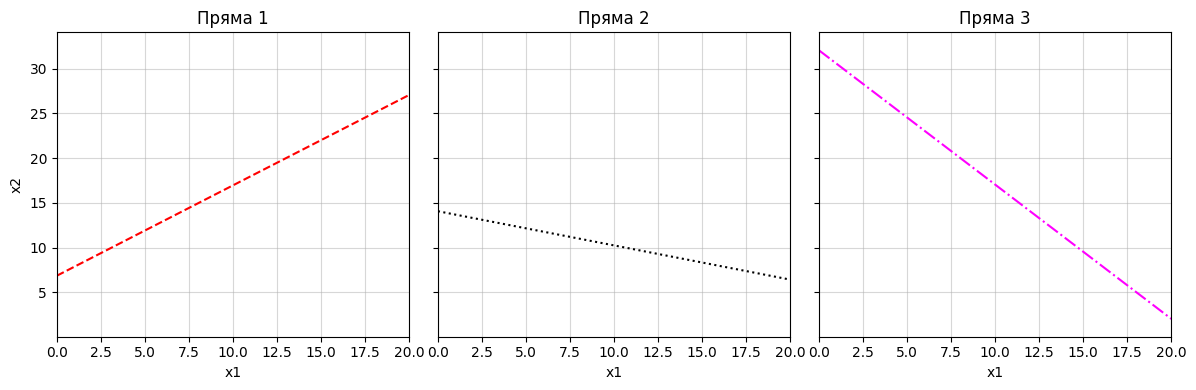

In [7]:
colors = ["red", "black", "magenta"]
styles = ["--", ":", "-."]
fig1, axes = plt.subplots(1, 3, figsize=(12, 4), sharey=True)
for i, ax in enumerate(axes):
    ax.plot(x, ys[i], linestyle=styles[i], color=colors[i])
    ax.set_xlim(0, 20)
    ax.set_ylim(y_min, y_max)
    ax.grid(True, alpha=0.5)
    ax.set_title(f"Пряма {i + 1}")
    ax.set_xlabel("x1")
axes[0].set_ylabel("x2")
plt.tight_layout()
plt.show()
fig1.savefig("lines_separate.png", dpi=100)
fig1.savefig("lines_separate.jpg", dpi=100)
fig1.savefig("lines_separate.svg")

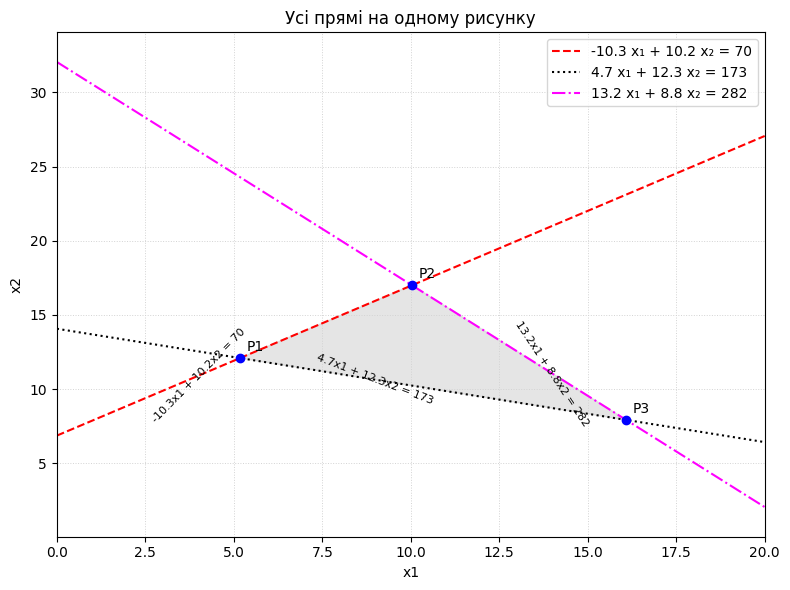

In [8]:
fig2, ax = plt.subplots(figsize=(8, 6), dpi=100)

for i, (a, b, c) in enumerate(coeffs):
    ax.plot(x, ys[i],
            linestyle=styles[i],
            color=colors[i],
            label=f"{a} x₁ + {b} x₂ = {c}")
ax.fill(points[:, 0], points[:, 1],
        color="0.8", alpha=0.5)
ax.scatter(points[:, 0], points[:, 1], color="blue", zorder=5)

for k, (px, py) in enumerate(points):
    ax.annotate(f"P{k + 1}",
                (px, py),
                xytext=(5, 5),
                textcoords="offset points")
for i, (a, b, c) in enumerate(coeffs):
    m = -a / b
    angle = np.degrees(np.arctan(m))

    x_pos = 4 + i * 5
    y_pos = (c - a * x_pos) / b

    text = f"{a}x1 + {b}x2 = {c}"
    ax.text(x_pos, y_pos, text,
            rotation=angle,
            fontsize=8,
            ha="center",
            va="center")
ax.set_xlim(0, 20)
ax.set_ylim(y_min, y_max)
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_title("Усі прямі на одному рисунку")
ax.grid(True, color="lightgray", linestyle=":", linewidth=0.7)
ax.legend()
plt.tight_layout()
plt.show()
fig2.savefig("lines_all.png", dpi=100)
fig2.savefig("lines_all.jpg", dpi=100)
fig2.savefig("lines_all.svg")